### 최적화 문제

최적화 문제는 함수  𝑓 의 값을 최대화 혹은 최소화하는 변수  𝑥 의 값  𝑥∗ 를 찾는 것이다. 수식으로는 다음처럼 쓴다.

$$x^{\ast} = \arg \max_x f(x) $$

또는

$$x^{\ast} = \arg \min_x f(x) $$


이 값  𝑥∗ 를 최적화 문제의 해(solution)라고 한다. 만약 최소화 문제를 풀 수 있다면  𝑓(𝑥) 를  −𝑓(𝑥) 로 바꾸어 위아래를 뒤집은 다음의 최소화 문제를 풀면  𝑓(𝑥) 의 최대화 문제를 푸는 것과 같다. 따라서 보통은 최소화 문제만 고려한다.

이때 최소화하려는 함수  𝑓(𝑥) 를 목적함수(objective function), 비용함수(cost function), 손실함수(loss function) 오차함수(error function) 등으로 부른다. 기호로는 각각  𝐽,𝐶,𝐿,𝐸 로 표기하는 경우가 많다.

#### 예제 1.
다음은 1차원 목적함수의 예이다. 그래프에서 이 목적함수  𝑓1(𝑥) 의 최저점은  𝑥∗=2 임을 알 수 있다.

In [2]:
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 12

path = "/Library/Fonts/NanumGothic.otf"
font_name = fm.FontProperties(fname=path, size=20).get_name()

plt.rc('font', family=font_name)

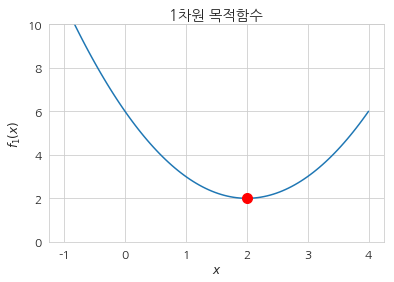

In [6]:
def f1(x):
    return (x - 2) ** 2 + 2

xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', ms=10)
plt.ylim(0, 10)
plt.xlabel("$x$")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

#### 예제 2.
다음 함수  $𝑓_2(𝑥,𝑦)$ 는 2차원 목적함수의 예로 2차원 로젠브록(Rosenbrock) 함수라고 한다. 2차원 로젠브록 함수는  𝑥∗,𝑦∗=(1,1) 에서 최솟값을 가진다.

$$f(x, y) = (1 − x )^2 + 100(y − x^2)^2$$

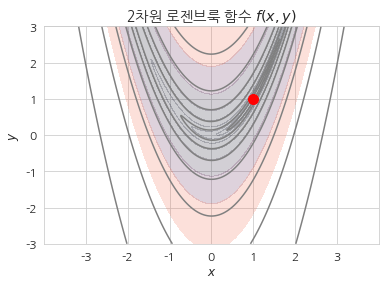

In [16]:
def f2(x, y):
    return (1 - x)**2 + 100.0*(y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', ms=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.xticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브룩 함수 $f(x, y)$")
plt.show()

### 그리드 서치와 수치적 최적화
목적함수의 값을 가장 작게 하는  𝑥  위치를 찾는 최적화 문제를 푸는 가장 간단한 방법은 가능한  𝑥 의 값을 여러개 넣어 보고 그중 가장 작은 값을 선택하는 그리드 서치(grid search) 방법이다. 함수  𝑓1(𝑥) 의 그래프를 그려 최저점을 찾은 방법도 그리드 서치 방법의 일종이다. 

그리드 서치는 가장 간단한 방법이지만 많은  𝑥  위치에 대해 목적함숫값을 계산해야 한다. 위에서 함수  𝑓1(𝑥) 의 최저점을 찾을 때는 사실 함수 계산을 100번 수행했다.
예측 모형을 만들 때 목적함숫값, 즉 예측 오차를 구하려면 모든 트레이닝 데이터 집합에 대해 예측값과 타깃값의 차이를 구해야 하므로 계산량이 상당히 크다. 따라서 목적함수 계산을 적게 할 수 있는 방법이 필요하다.

###### 수치적 최적화 : 최저점이 될때까지 가장 적은 횟수만큼 x의 위치를 옮기는 방법
반복적 시행 착오(trial and error)에 의해 최적화 필요조건을 만족하는 값  𝑥∗ 를 찾는 방법을 수치적 최적화(numerical optimization)라고 한다. 수치적 최적화 방법은 함수 위치가 최저점이 될 때까지 가능한 한 적은 횟수만큼  𝑥  위치를 옮기는 방법을 말한다.

수치적 최적화 방법은 다음의 두 가지 알고리즘을 요구한다.

+ 현재 위치  $𝑥_𝑘$ 가 최적점인지 판단하는 알고리즘
+ 어떤 위치  $𝑥_𝑘$ 를 시도한 뒤, 다음 번에 시도할 위치  $𝑥_𝑘+1$ 을 찾는 알고리즘